In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import spatial
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [4]:
df_data = pd.read_csv('./all_annotated.csv')
df_data

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [145]:
df_data['Median']= df_data.median(axis=1)


In [146]:
df_val = df_data['Median'] != 0
df_not0 = df_data.loc[df_val,:]

In [133]:
df_new = df_not0.drop(columns = 'Median')

In [298]:
df_tg = df_new.iloc[:, 0:2]

In [299]:
df_new2 = df_new.iloc[:, 2:] + 0.1

In [327]:
df_log = np.log2(df_new2)

In [328]:
df_log.insert(0, 'gene_name', df_tg.iloc[:,1])
df_log.insert(0, 't_name', df_tg.iloc[:,0])

In [329]:
df_trans = df_log

In [301]:
df_log.reset_index(inplace=True)

In [307]:
df_log

,index,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
1,8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
2,9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
3,10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
4,11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
8609,34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
8610,34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
8611,34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [152]:
z= linkage(df_log.iloc[:, 1:])
z

array([[1.32300000e+03, 1.32400000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.16300000e+03, 2.16400000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.36800000e+03, 4.36900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.93200000e+03, 1.72210000e+04, 1.30964034e+01, 8.61100000e+03],
       [4.80000000e+02, 1.72220000e+04, 1.32621231e+01, 8.61200000e+03],
       [2.71000000e+03, 1.72230000e+04, 1.46562268e+01, 8.61300000e+03]])

In [153]:
df_transpose = df_log.T

In [154]:
df_transpose

,0,1,2,3,4,5,6,7,8,9,...,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612
index,3.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,16.000000,32.000000,37.000000,...,34646.000000,34647.000000,34649.000000,34656.000000,34658.000000,34663.000000,34665.000000,34667.000000,34684.000000,34715.000000
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950


In [155]:
z2 = linkage(df_transpose.iloc[1:, :])

In [156]:
o = leaves_list(z)
o

array([2710,  480, 3932, ..., 5684, 2530, 4296], dtype=int32)

In [157]:
o2 = leaves_list(z2)
o2

array([ 6, 14,  7, 15,  5, 13,  1,  4, 12, 11,  9,  3,  8,  0,  2, 10],
      dtype=int32)

In [286]:
df_log.reindex(o)

,index,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
2710,10838,10.362427,9.674967,10.730739,10.533361,10.186101,9.915343,11.627885,6.513012,-3.321928,9.911055,9.153596,11.041927,9.669459,10.594618,-3.321928,9.770807
480,1771,5.834810,4.495864,5.910958,6.306998,-3.321928,-3.321928,-3.321928,6.690422,-3.321928,5.681848,5.848470,-3.321928,6.838377,6.329519,-3.321928,-3.321928
3932,15545,6.116518,-3.321928,6.332019,-3.321928,7.029427,7.333518,-3.321928,-3.321928,6.008203,6.486714,6.112357,-3.321928,6.888902,-3.321928,-3.321928,-3.321928
481,1772,10.616585,9.584416,10.723743,10.903922,11.426619,11.456581,11.891232,11.521811,10.592872,9.876014,10.790580,11.210067,11.347327,10.977238,-3.321928,11.715662
3746,14830,5.608112,-3.321928,-3.321928,6.886073,-3.321928,4.775450,-3.321928,7.226825,4.165947,5.750684,3.429699,6.536656,4.906105,-3.321928,4.011398,6.482741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,17883,3.697081,4.215109,3.753138,2.796918,3.022511,0.565386,-3.321928,-3.321928,3.743997,4.404787,4.144922,2.975323,2.514033,2.556431,1.510554,-3.321928
6033,23804,3.928964,4.456723,2.938631,2.515062,3.133134,2.203526,-3.321928,-3.321928,4.032783,3.644903,4.015114,3.918539,3.082398,3.742785,1.904281,-3.321928
5684,22645,3.654464,3.595382,5.371957,4.142772,4.846243,4.190093,-3.321928,-3.321928,2.719274,4.244179,4.159932,3.524966,5.205921,5.551469,1.252376,-3.321928
2530,10127,3.354926,3.734655,3.554976,4.292943,3.798314,4.012782,-3.321928,-3.321928,4.214183,4.118265,3.861936,4.782553,4.623693,4.259026,2.108582,-3.321928


In [287]:
df_trans2 = df_log.T
df_trans2

,0,1,2,3,4,5,6,7,8,9,...,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612
index,3.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,16.000000,32.000000,37.000000,...,34646.000000,34647.000000,34649.000000,34656.000000,34658.000000,34663.000000,34665.000000,34667.000000,34684.000000,34715.000000
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950


In [288]:
df_trans2 = df_trans2.iloc[1:]
df_trans2
df_trans2.reset_index(inplace=True)

In [289]:
df_trans_3 = df_trans2.reindex(o2)

In [290]:
df_trans_3

,index,0,1,2,3,4,5,6,7,8,...,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612
6,male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
14,female_14C,3.851021,-3.321928,2.897078,5.621212,5.736589,4.055034,-3.321928,3.857757,7.034024,...,1.736171,8.230804,2.040126,2.910599,5.029599,6.239269,6.523595,9.435277,-3.321928,0.323943
7,male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
15,female_14D,4.112914,4.665883,4.516802,6.280001,6.410012,5.210168,-3.321928,5.062683,7.175523,...,10.636689,10.727697,6.731971,5.617451,7.769718,7.386673,9.412730,12.153787,-2.713053,1.060677
5,male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
13,female_14B,4.522507,2.066050,2.913181,4.998373,5.113628,3.463944,-3.321928,-3.321928,4.547454,...,6.136627,6.744225,3.190147,2.170009,4.528337,5.452891,4.441070,8.818194,-3.321928,-0.095642
1,male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
4,male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
12,female_14A,4.995485,4.353582,4.784754,6.338167,6.453632,5.070394,5.784683,2.324036,4.410834,...,8.863958,9.872933,6.867815,6.401196,8.073001,7.891809,8.760742,6.942632,-1.913863,2.808283
11,female_13,3.669331,3.869772,4.729653,6.286330,6.439396,4.894166,4.692168,-3.321928,-3.321928,...,1.299810,9.019887,3.015881,5.543784,6.555514,6.170259,8.615611,11.867576,-1.927886,2.828667


In [291]:
df_ordered= df_trans_3.T
df_ordered
header = df_ordered.iloc[0]
df_int= df_ordered.iloc[1:]
df_int.columns = header
df_int


index,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
0,4.51853,3.85102,3.5586,4.11291,4.74968,4.52251,3.59309,4.24048,4.99549,3.66933,3.80963,3.77261,4.45905,4.57365,4.38319,4.05156
1,4.14581,-3.32193,3.43687,4.66588,-3.32193,2.06605,-3.32193,3.89776,4.35358,3.86977,-3.32193,-3.32193,-3.32193,3.47212,-3.32193,3.9058
2,3.80107,2.89708,3.70106,4.5168,2.9903,2.91318,-3.32193,4.4848,4.78475,4.72965,1.59416,4.80188,4.2227,4.26062,3.90037,4.20967
3,6.23034,5.62121,5.75061,6.28,2.94598,4.99837,2.01271,6.07272,6.33817,6.28633,4.08186,6.13017,5.48696,2.68161,2.66547,5.72869
4,6.34579,5.73659,5.90106,6.41001,6.95361,5.11363,3.55226,6.18816,6.45363,6.4394,4.1968,6.24561,5.60232,6.89997,6.90974,5.84408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,6.16692,6.23927,6.94574,7.38667,4.67518,5.45289,0.20933,6.6813,7.89181,6.17026,-0.371506,8.69687,6.90534,5.06356,3.31221,5.59722
8609,8.49332,6.5236,7.7975,9.41273,5.77831,4.44107,-0.437467,8.35056,8.76074,8.61561,1.17224,9.01452,8.25979,4.6616,4.41827,7.64975
8610,11.2838,9.43528,10.6901,12.1538,9.21394,8.81819,5.09509,11.1365,6.94263,11.8676,6.26032,12.2717,11.3326,11.1919,9.8575,11.0871
8611,-3.32193,-3.32193,-2.1434,-2.71305,-3.32193,-3.32193,-3.32193,-3.32193,-1.91386,-1.92789,-3.32193,-2.30182,0.00326833,-2.5348,-2.34821,-3.32193


In [217]:
import seaborn as sns

Text(0.5, 1.0, 'Differential gene expression')

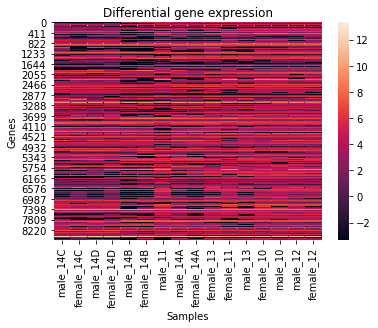

In [280]:
ax = sns.heatmap(df_int.astype(float))
ax.set_xlabel('Samples')
ax.set_ylabel('Genes')
ax.set_title('Differential gene expression')

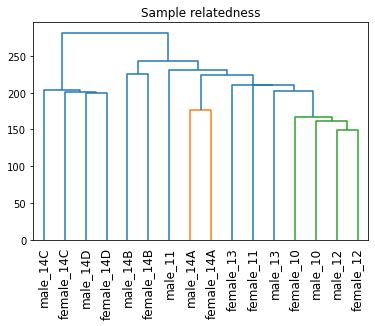

In [278]:
label = ['male_10', 'male_11', 'male_12', 'male_13', 'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10', 'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B', 'female_14C', 'female_14D']
dendrogram(z2, labels = label)
plt.xticks(rotation = 90)
plt.title('Sample relatedness')
plt.show()


In [306]:
df_trans

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,NaN,NaN,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
1,NaN,NaN,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
2,NaN,NaN,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
3,FBtr0302347,CR40182,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
4,NaN,NaN,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,NaN,NaN,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
8609,FBtr0072790,dlt,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
8610,FBtr0072777,Cdc37,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
8611,NaN,NaN,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [322]:
df_trans

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,male_14,female_14
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.266821,4.370482
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.039629,1.940897
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,3.744308,3.777954
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.249912,5.809438
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.347153,5.928465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.117284,6.742661
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.604923,7.284534
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.581071,9.337472
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,-3.027297,-2.817693


In [330]:
male14 = df_trans.loc[: , 'male_14A': 'male_14D']
df_trans['male_14'] = male14.mean(axis = 1)
female14 = df_trans.loc[: , 'female_14A' : 'female_14D']
df_trans['female_14'] = female14.mean(axis = 1)
df_trans.pop('male_14A')
df_trans.pop('male_14B')
df_trans.pop('male_14C')
df_trans.pop('male_14D')
df_trans.pop('female_14A')
df_trans.pop('female_14B')
df_trans.pop('female_14C')
df_trans.pop('female_14D')

3         4.112914
8         4.665883
9         4.516802
10        6.280001
11        6.410012
           ...    
34663     7.386673
34665     9.412730
34667    12.153787
34684    -2.713053
34715     1.060677
Name: female_14D, Length: 8613, dtype: float64

In [332]:
df_trans.pop('t_name')

3        FBtr0302347
8        FBtr0113885
9        FBtr0301810
10       FBtr0113895
11       FBtr0345179
            ...     
34663    FBtr0100884
34665    FBtr0100886
34667    FBtr0100888
34684    FBtr0114261
34715    FBtr0114216
Name: t_name, Length: 8613, dtype: object

In [333]:
df_trans

,gene_name,male_10,male_11,male_12,male_13,female_10,female_11,female_12,female_13,male_14,female_14
3,CR40182,4.573651,3.593093,4.383186,3.772605,4.459054,3.809626,4.051558,3.669331,4.266821,4.370482
8,Parp,3.472120,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,3.905799,3.869772,2.039629,1.940897
9,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.222705,1.594158,4.209672,4.729653,3.744308,3.777954
10,Tim17b,2.681610,2.012708,2.665469,6.130167,5.486961,4.081859,5.728691,6.286330,5.249912,5.809438
11,Tim17b,6.899972,3.552258,6.909741,6.245611,5.602316,4.196805,5.844084,6.439396,6.347153,5.928465
...,...,...,...,...,...,...,...,...,...,...,...
34663,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.905339,-0.371506,5.597221,6.170259,6.117284,6.742661
34665,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.259794,1.172241,7.649749,8.615611,7.604923,7.284534
34667,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.332554,6.260317,11.087133,11.867576,10.581071,9.337472
34684,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,0.003268,-3.321928,-3.321928,-1.927886,-3.027297,-2.817693


In [350]:
df_trans.T

,3,8,9,10,11,12,13,16,32,37,...,34646,34647,34649,34656,34658,34663,34665,34667,34684,34715
gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12581,CG12582,...,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR41590,CR40679
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,5.82113,6.40385,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,4.05956,5.46229,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,3.60902,10.2568,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383
female_10,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,4.53384,...,7.63422,9.3767,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295
female_11,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,3.09516,...,1.14094,3.88932,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145
female_12,4.05156,3.9058,4.20967,5.72869,5.84408,4.18035,5.28807,-3.32193,-3.32193,4.83113,...,6.73928,8.4043,-3.32193,5.23133,4.49034,5.59722,7.64975,11.0871,-3.32193,2.24773
female_13,3.66933,3.86977,4.72965,6.28633,6.4394,4.89417,4.69217,-3.32193,-3.32193,4.32467,...,1.29981,9.01989,3.01588,5.54378,6.55551,6.17026,8.61561,11.8676,-1.92789,2.82867
male_14,4.26682,2.03963,3.74431,5.24991,6.34715,4.58696,2.10393,-0.100601,5.59055,0.229787,...,7.08789,7.64453,2.9124,4.52228,5.74188,6.11728,7.60492,10.5811,-3.0273,0.571451


In [340]:
X = df_trans[['male_10', 'male_11', 'male_12', 'male_13', 'male_14', 'female_10', 'female_11', 'female_12', 'female_13', 'female_14']]
Y = df_trans[['gene_name']]

In [344]:
ols_m_model = smf.ols(formula= 'male_10 + male_11 + male_12 + male_13 + male_14 + female_10 + female_11 + female_12 + female_13 + female_14', data = df_trans)

PatsyError: model is missing required outcome variables